In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("dirty_iris.csv")

In [ ]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


In [ ]:
df.isnull().any()

Sepal.Length     True
Sepal.Width      True
Petal.Length     True
Petal.Width      True
Species         False
dtype: bool

In [ ]:
df.isna().sum()

Sepal.Length    10
Sepal.Width     17
Petal.Length    19
Petal.Width     12
Species          0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
df['Sepal.Length'].unique()

array([ 6.4,  6.3,  6.2,  5. ,  5.7,  5.3,  5.9,  5.8,  4.8,  6. ,  6.8,
        nan,  5.5,  4.7,  5.6,  4.9,  5.4,  6.7,  4.6, 73. ,  6.5,  4.4,
        6.6,  0. ,  7.7,  7. ,  5.2,  5.1,  7.4,  4.3,  7.2,  6.1,  6.9,
        7.6,  7.9,  4.5, 49. ])

In [ ]:
df['Sepal.Width'].unique()

array([ 3.2,  3.3,  nan,  3.4,  2.6,  2.7,  3. ,  3.1,  3.5,  2.8,  3.9,
       -3. ,  4. ,  3.6, 29. ,  2.9,  2.2,  2.5,  4.2,  3.8,  2.3,  3.7,
        4.1, 30. ,  0. ])

In [ ]:
df['Petal.Length'].unique()

array([ 4.5  ,  6.   ,  5.4  ,  1.6  ,  3.5  ,    nan,  5.3  ,  5.1  ,
        4.1  ,  4.8  ,  1.7  ,  4.   ,  1.3  ,  4.2  ,  5.7  ,  5.9  ,
        1.4  ,  1.5  , 63.   ,  0.82 , 23.   ,  5.5  ,  5.8  ,  1.2  ,
        3.9  ,  6.7  ,  4.7  ,  4.4  ,  5.6  ,  3.3  ,  6.1  ,  1.1  ,
        4.9  ,  4.6  ,  6.6  ,  0.   ,  6.4  ,  5.2  ,  1.9  ,  4.3  ,
        5.   ,  0.925,  6.9  , 14.   ,  3.6  ,  3.8  ])

In [ ]:
df['Petal.Width'].unique()

array([1.5, 2.5, 2.3, 0.4, 1. , 0.2, nan, 1.8, 0.6, 1.6, 1.4, 1.3, 0.1,
       2.1, 2. , 1.2, 1.9, 2.2, 0.3, 1.1, inf, 1.7, 2.4, 0.5])

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(95, 5)

In [ ]:
def remove_outliers(df, columns):
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
def remove_outliers(df, columns):
    for column in columns:
        lower_bound = df[column].quantile(0.10)
        upper_bound = df[column].quantile(0.90)
        df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    df.dropna(inplace=True)

columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
remove_outliers(df, columns)

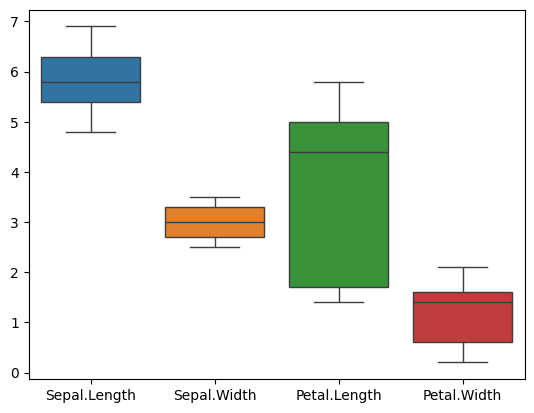

In [ ]:
sns.boxplot(data=df)
plt.show()

In [ ]:

rule1 = df['Sepal.Length'].apply(lambda x: True if x>3 and x<6 else False)
rule2 = df['Sepal.Width'].apply(lambda x: True if x>0 and x<3 else False)
rule3 = df['Petal.Length'].apply(lambda x: True if x>0 and x<5 else False)
rule4 = df['Petal.Width'].apply(lambda x: True if x>1 and x<2 else False)
Rules = pd.DataFrame({"Rule 1": rule1, "Rule 2": rule2, "Rule 3": rule3,"Rule 4": rule4})
Rules = Rules.astype(int)
print(Rules)

     Rule 1  Rule 2  Rule 3  Rule 4
0         0       0       1       1
3         1       0       1       0
4         1       1       1       0
7         1       0       0       1
8         1       1       1       0
9         1       0       1       0
10        1       0       1       0
11        0       1       0       1
13        0       1       1       1
28        0       0       0       0
32        1       1       1       1
36        0       0       0       1
38        0       1       0       1
39        1       0       1       0
41        1       1       1       1
43        1       1       0       1
49        0       0       1       1
50        1       1       1       1
52        1       1       1       1
53        1       0       1       0
54        0       0       1       1
59        0       1       0       0
63        1       0       1       0
65        0       1       1       1
70        0       0       1       1
72        1       0       1       0
74        1       1       1 

In [ ]:
print("number of rules violated: ", len(Rules)-Rules["Rule 1"].sum())


number of rules violated:  22


In [ ]:
print("number of rules violated: ", len(Rules)-Rules["Rule 2"].sum())

number of rules violated:  29


In [ ]:
print("number of rules violated: ", len(Rules)-Rules["Rule 3"].sum())


number of rules violated:  15


In [ ]:
print("number of rules violated: ", len(Rules)-Rules["Rule 4"].sum())

number of rules violated:  22


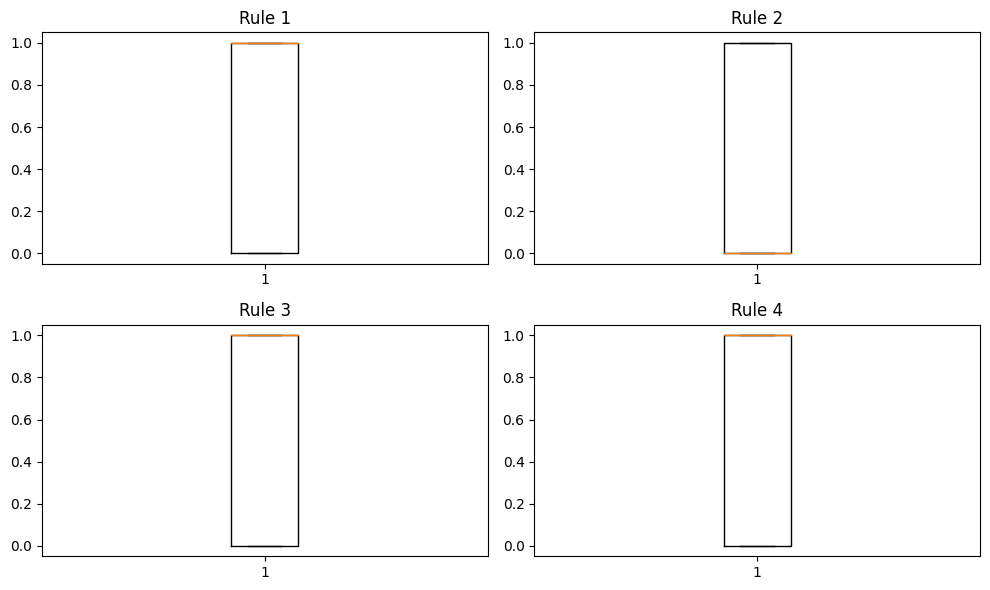

In [ ]:

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.boxplot(Rules["Rule 1"])
plt.title("Rule 1")

plt.subplot(2, 2, 2)
plt.boxplot(Rules["Rule 2"])
plt.title("Rule 2")

plt.subplot(2, 2, 3)
plt.boxplot(Rules["Rule 3"])
plt.title("Rule 3")

plt.subplot(2, 2, 4)
plt.boxplot(Rules["Rule 4"])
plt.title("Rule 4")

plt.tight_layout()
plt.show()


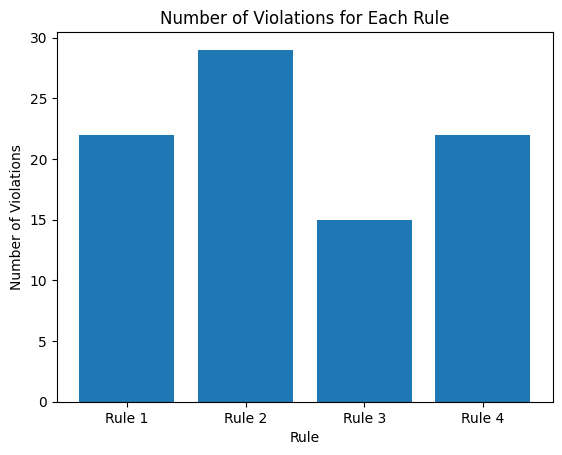

In [ ]:

rule1_violate = len(Rules) - Rules["Rule 1"].sum()
rule2_violate = len(Rules) - Rules["Rule 2"].sum()
rule3_violate = len(Rules) - Rules["Rule 3"].sum()
rule4_violate = len(Rules) - Rules["Rule 4"].sum()

x = ["Rule 1", "Rule 2", "Rule 3", "Rule 4"]
y = [rule1_violate, rule2_violate, rule3_violate, rule4_violate]

plt.bar(x, y)
plt.xlabel("Rule")
plt.ylabel("Number of Violations")
plt.title("Number of Violations for Each Rule")
plt.show()
